In [1]:
from datetime import date
import covidcast
import matplotlib.pyplot as plt

data = covidcast.signal("usa-facts", "confirmed_7dav_incidence_num",
                        date(2020, 3, 15), date(2021, 1, 1),
                        "state")

death = covidcast.signal("usa-facts", 'deaths_7dav_incidence_num',
                        date(2020, 3, 15), date(2021, 1, 1),
                        "state")

In [3]:
#plt.rcParams['figure.figsize'] = [5.5, 4]
SMALL_SIZE = 10.5
MEDIUM_SIZE = 11
MEDIUM_Plus= 11.5
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_Plus)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['figure.figsize'] = [13, 2.9]


In [4]:
data[:3]

,geo_value,signal,time_value,direction,issue,lag,value,stderr,sample_size,geo_type,data_source
0,ak,confirmed_7dav_incidence_num,2020-03-15,0,2020-07-09,116,0.142857,None,None,state,usa-facts
1,al,confirmed_7dav_incidence_num,2020-03-15,0,2020-07-09,116,3.142857,None,None,state,usa-facts
2,ar,confirmed_7dav_incidence_num,2020-03-15,0,2020-07-09,116,2.285714,None,None,state,usa-facts


In [5]:
time='time_value'
top5 = data[(data[time]>='2020-04-01') & (data[time]<='2020-12-01')].groupby('geo_value')['value'].sum().sort_values()[-5:]#.reset_index()[].tolist()#nlargest(5)
print(top5)

geo_value
ny    5.814609e+05
il    7.085033e+05
fl    9.798217e+05
tx    1.165227e+06
ca    1.192336e+06
Name: value, dtype: float64


In [6]:
data[(data[time]>='2020-04-01') & (data[time]<='2020-12-01') & (data['geo_value']=='tx')]['value'].sum()

1165227.142857273

0.788114462279782

In [7]:
data[(data[time]>='2020-04-01') & (data[time]<='2020-12-01')]['value'].sum()
print(10190083/12929699.285714291)


0.788114462279782


In [8]:
death[(death[time]>='2020-04-01') & (death[time]<='2020-12-01') & (death['geo_value']=='tx')]['value'].sum()




21227.14285732856

In [9]:
print((58012.857142857145/1165223.5714285728)*100)
print((3/21227.14285714288)*100)


4.978688945652975
0.014132848778518056


Index(['time_value', 'value'], dtype='object')
               value
time_value          
2020-03-15  0.013122
2020-03-16  0.017337
2020-03-17  0.016141
2020-03-18  0.015365
2020-03-19  0.014240
2020-03-20  0.012592
2020-03-21  0.012085
2020-03-22  0.012572
2020-03-23  0.012418
2020-03-24  0.014290


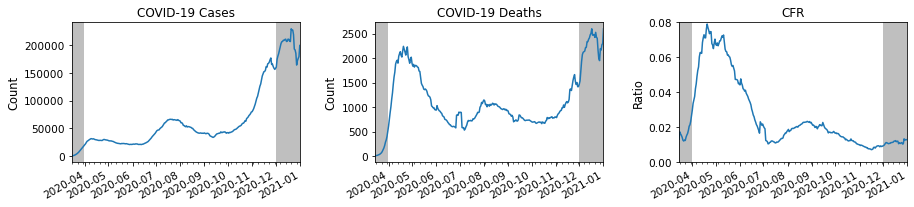

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
time = 'time_value'
fig, ax = plt.subplots(1,3)

data.groupby(time)['value'].sum().plot(ax=ax[0])
death.groupby(time)['value'].sum().plot(ax=ax[1])


cfr_value =  death.groupby(time)['value'].sum().reset_index()['value'] / data.groupby(time)['value'].sum().reset_index()['value']
cfr = data.groupby(time)['value'].sum().reset_index()
cfr['value'] = cfr_value
print(cfr.columns)
cfr = pd.DataFrame(cfr)
#cfr[time] = 
cfr.set_index('time_value', inplace=True)#,# inplace=True)
print(cfr[:10])
cfr['value'].plot(ax=ax[2])



min_date = pd.Timestamp("2020-03-15")
max_date = pd.Timestamp("2021-1-1")


for i in range(3):
    ax[i].set_xlabel("")
    ax[i].set_xlim(min_date, max_date)
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[2].set_ylabel('Ratio')

ax[0].set_title("COVID-19 Cases")
ax[1].set_title("COVID-19 Deaths")
ax[2].set_title("CFR")
ax[2].set_ylim(0, 0.08)
plt.tight_layout()



import matplotlib.dates as dates

for i in range(3):
    plt.gcf().autofmt_xdate()

    date_fmt = '20%y-%m'
    formatter = dates.DateFormatter(date_fmt)
    ax[i].xaxis.set_major_locator(dates.MonthLocator())
    ax[i].xaxis.set_major_formatter(formatter)
    ax[i].axvspan(pd.Timestamp('2020-12-01'), pd.Timestamp(max_date), color='grey', alpha=0.5, lw=0)
    ax[i].axvspan(pd.Timestamp(min_date), pd.Timestamp(min_date) + pd.Timedelta(days=16), color='grey', alpha=0.5, lw=0)
    
fig.savefig('img_country/{}'.format('national_cases.svg'), bbox_inches='tight')


In [25]:
df = data.groupby(time)['value'].sum().reset_index()
df[df['value'] == df['value'].max()]

,time_value,value
281,2020-12-21,229773.857143


In [26]:
df = death.groupby(time)['value'].sum().reset_index()
df[df['value'] == df['value'].max()]

,time_value,value
277,2020-12-17,2599.142857


In [11]:
time2 = "2020-7-15"

In [12]:
time

'time_value'

In [13]:
min_date = pd.Timestamp('2020-04-01')
max_date = pd.Timestamp('2020-12-01')


data[(data[time]>=min_date) &(data[time]<=max_date)]['value'].sum()

12929707.857144378

In [14]:
10256613/13017060.428571433




0.7879361900700357

In [15]:
cfr = cfr[(cfr.index>='2020-07-15') & (cfr.index<='2020-12-01')]
min_cfr = cfr['value'].min()
max_cfr = cfr['value'].max()

print(min_cfr, max_cfr)

0.007142702863654744 0.023348104344218638


,geo_value,signal,time_value,direction,issue,lag,value,stderr,sample_size,geo_type,data_source
0,ak,confirmed_7dav_incidence_num,2020-03-15,0,2020-07-09,116,0.142857,None,None,state,usa-facts
1,al,confirmed_7dav_incidence_num,2020-03-15,0,2020-07-09,116,3.142857,None,None,state,usa-facts
2,ar,confirmed_7dav_incidence_num,2020-03-15,0,2020-07-09,116,2.285714,None,None,state,usa-facts
3,az,confirmed_7dav_incidence_num,2020-03-15,0,2020-07-09,116,1.142857,None,None,state,usa-facts
4,ca,confirmed_7dav_incidence_num,2020-03-15,0,2020-07-09,116,70.000000,None,None,state,usa-facts
...,...,...,...,...,...,...,...,...,...,...,...
46,vt,confirmed_7dav_incidence_num,2021-01-01,None,2021-01-02,1,90.285714,None,None,state,usa-facts
47,wa,confirmed_7dav_incidence_num,2021-01-01,None,2021-01-03,2,2366.142857,None,None,state,usa-facts
48,wi,confirmed_7dav_incidence_num,2021-01-01,None,2021-01-02,1,2454.000000,None,None,state,usa-facts
49,wv,confirmed_7dav_incidence_num,2021-01-01,None,2021-01-02,1,-674.428571,None,None,state,usa-facts


In [16]:
num = data[(data[time]>='2020-11-01')&(data[time]<'2020-12-01')]['value'].sum()
total = data[(data[time]>='2020-04-01')&(data[time]<'2020-12-01')]['value'].sum()
print("last:{}, total:{}, ratio:{}".format(num, total, num/total))

last:4107549.2857141322, total:12771459.857144363, ratio:0.32161940229693997
